# Predicting Polish demography (total population, year by year), using fertility rate, imigration data and historic population change.
First off, required imports:


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import re
import json


# Data to process
First of all, population over the years.
We will take this from World Development Indicators, as they have very recent data, just from 2024-03-28.



In [30]:


# Read the CSV file into a DataFrame
df = pd.read_csv('Countries_population.csv')

# Filter the DataFrame to include only the rows where the country is "Poland"
polish_population_df = df[df['Country Name'] == 'Poland']
polish_population_df = polish_population_df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_population_df.dropna(axis='columns',inplace=True)
#polish_population_df=polish_population_df.rename(index={0: 'Year', 1: 'Population'})
polish_population_df.index=['Population']
polish_population_df=polish_population_df.T
# Display the resulting DataFrame
polish_population_df


,Population
1960,29637450.0
1961,29964000.0
1962,30308500.0
1963,30712000.0
1964,31139450.0
...,...
2018,37974750.0
2019,37965475.0
2020,37899070.0
2021,37747124.0


Lets graph those values:

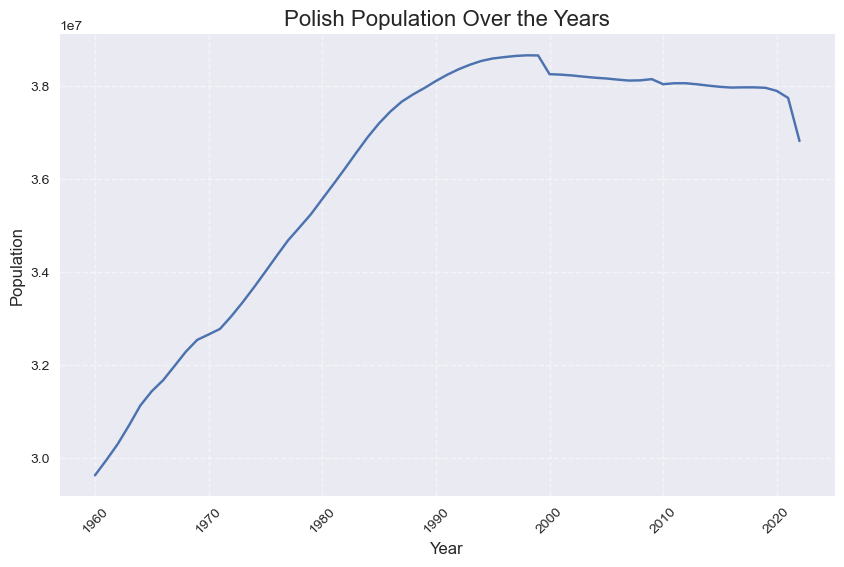

In [44]:


# Set the style of the plot
plt.style.use('seaborn-v0_8')

# Create the plot
ax = polish_population_df.plot(figsize=(10, 6), legend=False)

# Set the title and labels
ax.set_title('Polish Population Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Population', fontsize=12)

# Customize the tick labels
ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

# Show the grid
ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_population_over_the_years.png')
